# Text Data Loading, Creating a DataFrame

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import os
from textblob import TextBlob
import datetime as dt
from wordcloud import WordCloud
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [3]:
# Import csv file into a dataframe
df_15m = pd.read_csv('./Resources/fifteen_min_for_sixty_day.csv')

In [4]:
# convert the timezone to CST
df_15m['Datetime'] = pd.to_datetime(df_15m['Datetime'], utc=True)
df_15m['Datetime'] = pd.DatetimeIndex(df_15m['Datetime']).tz_convert('US/Central')
# rename the column 'Datetime'
df_15m = df_15m.rename(columns = {'Datetime':'date'})

In [5]:
df_15m.head()

date        Open        High         Low       Close   Adj Close   Volume
0 2020-07-22 08:30:00-05:00  319.799988  325.283997  316.639984  318.320007  318.320007  1639907
1 2020-07-22 08:45:00-05:00  318.398010  321.898010  317.620117  320.765991  320.765991   562159
2 2020-07-22 09:00:00-05:00  320.798004  321.795990  318.564240  319.756012  319.756012   425523
3 2020-07-22 09:15:00-05:00  319.812012  320.200012  317.000000  317.351990  317.351990   357633
4 2020-07-22 09:30:00-05:00  317.174011  318.970001  316.600189  317.200012  317.200012   308357

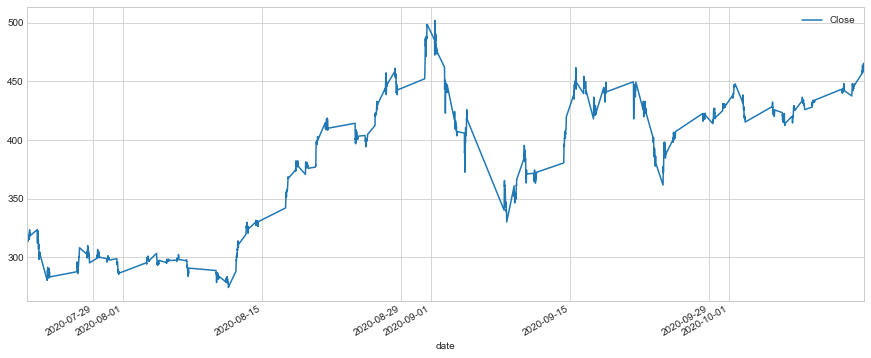

In [6]:
df_15m.plot(x='date', y='Close', figsize=(15,6));

In [7]:
# Import a text file to analyze
df_tsla = pd.read_csv('./Resources/concat_query_tesla_price_final.csv')

In [8]:
df_tsla['date'] = pd.to_datetime(df_tsla['date'], utc=True)
df_tsla['date'] = pd.DatetimeIndex(df_tsla['date']).tz_convert('US/Central')

In [9]:
df_tsla = df_tsla.sort_values('date', ascending = True)
df_tsla = df_tsla.reset_index(drop=True)
df_tsla.head()

date                                               text  Subjectivity  Polarity  Analysis
0 2020-05-01 00:00:37-05:00  being in the s&p means s&p index stock funds *...          0.15      -0.2  Negative
1 2020-05-01 00:05:33-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral
2 2020-05-01 00:07:22-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral
3 2020-05-01 00:30:45-05:00  tesla vp explains why china-made model 3 drops...          0.00       0.0   Neutral
4 2020-05-01 00:31:01-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral

In [10]:
# dropping dates before 2020-07-20
df_tsla = df_tsla[df_tsla['date'] > '2020-07-20']

## Labelling price increase or decrease by interval

In [11]:
# df_daily['daily return'] = df_daily['Close'].pct_change()
df_15m['15min return'] = df_15m['Close'].pct_change()

In [12]:
# Or add a column with binary number.
def getBinary(score):
    if score <= 0:
        return 0
    else:
        return 1

df_15m['tick'] = df_15m['15min return'].apply(getBinary)
df_15m.head(10)

date        Open        High         Low       Close   Adj Close   Volume  15min return  tick
0 2020-07-22 08:30:00-05:00  319.799988  325.283997  316.639984  318.320007  318.320007  1639907           NaN     1
1 2020-07-22 08:45:00-05:00  318.398010  321.898010  317.620117  320.765991  320.765991   562159      0.007684     1
2 2020-07-22 09:00:00-05:00  320.798004  321.795990  318.564240  319.756012  319.756012   425523     -0.003149     0
3 2020-07-22 09:15:00-05:00  319.812012  320.200012  317.000000  317.351990  317.351990   357633     -0.007518     0
4 2020-07-22 09:30:00-05:00  317.174011  318.970001  316.600189  317.200012  317.200012   308357     -0.000479     0
5 2020-07-22 09:45:00-05:00  317.464325  317.778015  312.399994  314.821991  314.821991   613666     -0.007497     0
6 2020-07-22 10:00:00-05:00  314.891998  315.971985  312.910004  313.325989  313.325989   364568     -0.004752     0
7 2020-07-22 10:15:00-05:00  313.332703  316.837982  313.244019  316.834015  316.834015   333205      0.011196     1
8 2020-07-22 10:30:00-05:00  316.954010  318.799988  316.324524  317.649994  317.649994   484279      0.002575     1
9 2020-07-22 10:45:00-05:00  317.596008  318.399994  316.221985  316.622009  316.622009   244154     -0.003236     0

In [13]:
df_15m['date only'] = df_15m['date'].dt.date
df_15m['hour'] = df_15m['date'].dt.hour
df_15m['minute'] = df_15m['date'].dt.minute
df_15m.head()

date        Open        High         Low       Close   Adj Close   Volume  15min return  tick   date only  hour  minute
0 2020-07-22 08:30:00-05:00  319.799988  325.283997  316.639984  318.320007  318.320007  1639907           NaN     1  2020-07-22     8      30
1 2020-07-22 08:45:00-05:00  318.398010  321.898010  317.620117  320.765991  320.765991   562159      0.007684     1  2020-07-22     8      45
2 2020-07-22 09:00:00-05:00  320.798004  321.795990  318.564240  319.756012  319.756012   425523     -0.003149     0  2020-07-22     9       0
3 2020-07-22 09:15:00-05:00  319.812012  320.200012  317.000000  317.351990  317.351990   357633     -0.007518     0  2020-07-22     9      15
4 2020-07-22 09:30:00-05:00  317.174011  318.970001  316.600189  317.200012  317.200012   308357     -0.000479     0  2020-07-22     9      30

### Text dataframe processing

In [14]:
df_tsla['date only'] = df_tsla['date'].dt.date
df_tsla['hour'] = df_tsla['date'].dt.hour
df_tsla['minute'] = df_tsla['date'].dt.floor(freq='15T').dt.minute
df_tsla.head()

date                                               text  Subjectivity  Polarity  Analysis   date only  hour  minute
19229 2020-07-20 00:04:49-05:00  i think many @nikolatrevor are looking forward...      0.312500  0.250000  Positive  2020-07-20     0       0
19230 2020-07-20 00:09:00-05:00  customers are inevitably paying for the full p...      0.508333  0.150000  Positive  2020-07-20     0       0
19231 2020-07-20 00:16:32-05:00  bitcoin could see an extremely strong rally af...      0.527778  0.127778  Positive  2020-07-20     0      15
19232 2020-07-20 00:39:24-05:00  @elonmusk canada needs tesla m3 lr rwd. bring ...      0.367143  0.217143  Positive  2020-07-20     0      30
19233 2020-07-20 01:39:42-05:00  and, of course, your car will be able to buy a...      0.625000  0.500000  Positive  2020-07-20     1      30

### Subjectivity Score Processing (optional)

1. Dropping rows with subjectivity score more than 0.4 or
2. Instead of dropping out, creating a new column with a polarity score weighted by subjectivity score.
  - If subjectivity score <= 0.2, weighting 140% of the corresponding polarity score
  - If  0.2 < subjectivity score <= 0.4, weighting 120% of the corresponding polarity score
  - Likewise,  0.4 < subjectivity score <= 0.6, => 100%   
               0.6 < subjectivity score <= 0.8, => 80%   
               0.8 < subjectivity score <= 1.0, => 60%

#### 1. Dropping all rows that have subjectivity scores more than 0.4

In [15]:
df_tsla_drop = df_tsla[df_tsla['Subjectivity']<= 0.4]

In [16]:
df_tsla_drop.head()

date                                               text  Subjectivity  Polarity  Analysis   date only  hour  minute
19229 2020-07-20 00:04:49-05:00  i think many @nikolatrevor are looking forward...      0.312500  0.250000  Positive  2020-07-20     0       0
19232 2020-07-20 00:39:24-05:00  @elonmusk canada needs tesla m3 lr rwd. bring ...      0.367143  0.217143  Positive  2020-07-20     0      30
19234 2020-07-20 01:43:28-05:00  citigroup increases tesla $tsla price target t...      0.000000  0.000000   Neutral  2020-07-20     1      30
19236 2020-07-20 02:08:05-05:00  thanks for helping the share price bro!! parts...      0.254167  0.015625  Positive  2020-07-20     2       0
19239 2020-07-20 03:22:06-05:00  everyone was acting like @elonmusk was a fool ...      0.304815 -0.045093  Negative  2020-07-20     3      15

#### 2. Add a new column with the weighted polarity score

In [17]:
df_tsla_weight = df_tsla.copy()

In [18]:
def getWeight(score):
    if score <= 0.2:
        return 1.4
    elif score <=0.4:
        return 1.2
    elif score <=0.6:
        return 1.0
    elif score <=0.8:
        return 0.8
    else:
        return 0.6


df_tsla_weight['Adj Polarity'] = df_tsla['Subjectivity'].apply(getWeight)*df_tsla['Polarity']
df_tsla_weight.tail()     

date                                               text  Subjectivity  Polarity  Analysis   date only  hour  minute  Adj Polarity
41425 2020-10-13 14:07:47-05:00  i hate days like this, where my tesla news fee...      0.500000 -0.205000  Negative  2020-10-13    14       0     -0.205000
41426 2020-10-13 14:12:40-05:00  tesla cuts model s price by $3,000 amid sales ...      0.000000  0.000000   Neutral  2020-10-13    14       0      0.000000
41427 2020-10-13 14:20:53-05:00  would love a tesla. out of my price range atm ...      0.600000  0.500000  Positive  2020-10-13    14      15      0.500000
41428 2020-10-13 14:20:59-05:00  on ann: nhtsa probes fires in certain chevy bo...      0.512987  0.175325  Positive  2020-10-13    14      15      0.175325
41429 2020-10-13 14:26:07-05:00  why get a model s perf to drive around alone w...      0.750000  0.450000  Positive  2020-10-13    14      15      0.360000

## Merging Dataframes

#### 1. For df_tsla_drop

In [19]:
# Merging the dataframes by using reduce function
from functools import reduce
data_frames = [df_tsla_drop, df_15m]
df_drop = reduce(lambda  left,right: pd.merge(left,right,on=['date only', 'hour', 'minute'],
                                            how='outer'), data_frames)
df_drop.head()

date_x                                               text  Subjectivity  Polarity  Analysis   date only  hour  minute date_y  Open  High  Low  Close  Adj Close  Volume  15min return  tick
0 2020-07-20 00:04:49-05:00  i think many @nikolatrevor are looking forward...      0.312500  0.250000  Positive  2020-07-20     0       0    NaT   NaN   NaN  NaN    NaN        NaN     NaN           NaN   NaN
1 2020-07-20 00:39:24-05:00  @elonmusk canada needs tesla m3 lr rwd. bring ...      0.367143  0.217143  Positive  2020-07-20     0      30    NaT   NaN   NaN  NaN    NaN        NaN     NaN           NaN   NaN
2 2020-07-20 01:43:28-05:00  citigroup increases tesla $tsla price target t...      0.000000  0.000000   Neutral  2020-07-20     1      30    NaT   NaN   NaN  NaN    NaN        NaN     NaN           NaN   NaN
3 2020-07-20 02:08:05-05:00  thanks for helping the share price bro!! parts...      0.254167  0.015625  Positive  2020-07-20     2       0    NaT   NaN   NaN  NaN    NaN        NaN     NaN           NaN   NaN
4 2020-07-20 03:22:06-05:00  everyone was acting like @elonmusk was a fool ...      0.304815 -0.045093  Negative  2020-07-20     3      15    NaT   NaN   NaN  NaN    NaN        NaN     NaN           NaN   NaN

#### 2. For df_tsla_weight

In [20]:
# Merging the dataframes by using reduce function
from functools import reduce
data_frames = [df_tsla_weight, df_15m]
df_weight = reduce(lambda  left,right: pd.merge(left,right,on=['date only', 'hour', 'minute'],
                                            how='outer'), data_frames)
df_weight.head()

date_x                                               text  Subjectivity  Polarity  Analysis   date only  hour  minute  Adj Polarity date_y  Open  High  Low  Close  Adj Close  Volume  15min return  tick
0 2020-07-20 00:04:49-05:00  i think many @nikolatrevor are looking forward...      0.312500  0.250000  Positive  2020-07-20     0       0      0.300000    NaT   NaN   NaN  NaN    NaN        NaN     NaN           NaN   NaN
1 2020-07-20 00:09:00-05:00  customers are inevitably paying for the full p...      0.508333  0.150000  Positive  2020-07-20     0       0      0.150000    NaT   NaN   NaN  NaN    NaN        NaN     NaN           NaN   NaN
2 2020-07-20 00:16:32-05:00  bitcoin could see an extremely strong rally af...      0.527778  0.127778  Positive  2020-07-20     0      15      0.127778    NaT   NaN   NaN  NaN    NaN        NaN     NaN           NaN   NaN
3 2020-07-20 00:39:24-05:00  @elonmusk canada needs tesla m3 lr rwd. bring ...      0.367143  0.217143  Positive  2020-07-20     0      30      0.260571    NaT   NaN   NaN  NaN    NaN        NaN     NaN           NaN   NaN
4 2020-07-20 01:39:42-05:00  and, of course, your car will be able to buy a...      0.625000  0.500000  Positive  2020-07-20     1      30      0.400000    NaT   NaN   NaN  NaN    NaN        NaN     NaN           NaN   NaN

In [21]:
# Drop unnecessary columns
df_drop = df_drop.drop(columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Volume'])
df_weight = df_weight.drop(columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Volume', 'Polarity'])

In [22]:
df_drop['date only'] = pd.to_datetime(df_drop['date only'])
df_weight['date only'] = pd.to_datetime(df_weight['date only'])

In [23]:
df_drop = df_drop[['date only', 'hour', 'minute', 'Close', '15min return', 'tick','text', 'Subjectivity', 'Polarity', 'Analysis', 'date_x','date_y']]
df_weight = df_weight[['date only', 'hour', 'minute', 'Close', '15min return', 'tick','text', 'Subjectivity', 'Adj Polarity', 'Analysis', 'date_x','date_y']]

In [24]:
df_drop = df_drop.sort_values(['date only', 'hour', 'minute'], ascending=True)
df_weight = df_weight.sort_values(['date only', 'hour', 'minute'], ascending=True)

In [25]:
df_weight.head()

date only  hour  minute  Close  15min return  tick                                               text  Subjectivity  Adj Polarity  Analysis                    date_x date_y
0 2020-07-20     0       0    NaN           NaN   NaN  i think many @nikolatrevor are looking forward...      0.312500      0.300000  Positive 2020-07-20 00:04:49-05:00    NaT
1 2020-07-20     0       0    NaN           NaN   NaN  customers are inevitably paying for the full p...      0.508333      0.150000  Positive 2020-07-20 00:09:00-05:00    NaT
2 2020-07-20     0      15    NaN           NaN   NaN  bitcoin could see an extremely strong rally af...      0.527778      0.127778  Positive 2020-07-20 00:16:32-05:00    NaT
3 2020-07-20     0      30    NaN           NaN   NaN  @elonmusk canada needs tesla m3 lr rwd. bring ...      0.367143      0.260571  Positive 2020-07-20 00:39:24-05:00    NaT
4 2020-07-20     1      30    NaN           NaN   NaN  and, of course, your car will be able to buy a...      0.625000      0.400000  Positive 2020-07-20 01:39:42-05:00    NaT

In [26]:
# df.to_csv('./Resources/elonmusk_tweets_hourly_price.csv', index=False)

## Analysis

### Things to be considered
- What sentiment score should we use?    
  (Subjectivity or Polarity, or both combined - weighting on Polarity score with more objective one)    
- Which score value should we use to represent the same hourly(or daily) window, in case of having multiple scores?    
  (mean, count, add, take the first one or the last one, etc)   
- How to deal with texts generated off market hours including weekends?   
  (dropping them out or tagging them the same (up and down) ticker with the most recent one etc)   
 
 

### 1. Using various sentiment score(Polarity only) for all texts regardless of market hour. 

In [29]:
# take the average polarity scores in the same hour window.
df_mean = df_drop.groupby(['date only', 'hour', 'minute']).mean()
df_sum = df_drop.groupby(['date only', 'hour', 'minute']).sum()
df_count = df_drop.groupby(['date only', 'hour', 'minute']).count()
df_first = df_drop.groupby(['date only', 'hour', 'minute']).first()
df_last = df_drop.groupby(['date only', 'hour', 'minute']).last()
df_data = df_mean.copy()

In [30]:
df_data = df_data.rename(columns = {'Polarity':'polarity mean'})
df_data['polarity sum'] = df_sum['Polarity']
df_data['polarity count'] = df_count['Polarity']
df_data['polarity first'] = df_first['Polarity']
df_data['polarity last'] = df_last['Polarity']
df_data.head()

Close  15min return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last
date only  hour minute                                                                                                                     
2020-07-20 0    0         NaN           NaN   NaN      0.312500       0.250000      0.250000               1        0.250000       0.250000
                30        NaN           NaN   NaN      0.367143       0.217143      0.217143               1        0.217143       0.217143
           1    30        NaN           NaN   NaN      0.000000       0.000000      0.000000               1        0.000000       0.000000
           2    0         NaN           NaN   NaN      0.254167       0.015625      0.015625               1        0.015625       0.015625
           3    15        NaN           NaN   NaN      0.304815      -0.045093     -0.045093               1       -0.045093      -0.045093

In [31]:
df_data['polarity mean change'] = df_data['polarity mean'].pct_change()
df_data['polarity sum change'] = df_data['polarity sum'].pct_change()
df_data['polarity count change'] = df_data['polarity count'].pct_change()
df_data['polarity first change'] = df_data['polarity first'].pct_change()
df_data['polarity last change'] = df_data['polarity last'].pct_change()
df_data.head()

Close  15min return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour minute                                                                                                                                                                                                                                    
2020-07-20 0    0         NaN           NaN   NaN      0.312500       0.250000      0.250000               1        0.250000       0.250000                   NaN                  NaN                    NaN                    NaN                   NaN
                30        NaN           NaN   NaN      0.367143       0.217143      0.217143               1        0.217143       0.217143             -0.131429            -0.131429                    0.0              -0.131429             -0.131429
           1    30        NaN           NaN   NaN      0.000000       0.000000      0.000000               1        0.000000       0.000000             -1.000000            -1.000000                    0.0              -1.000000             -1.000000
           2    0         NaN           NaN   NaN      0.254167       0.015625      0.015625               1        0.015625       0.015625                   inf                  inf                    0.0                    inf                   inf
           3    15        NaN           NaN   NaN      0.304815      -0.045093     -0.045093               1       -0.045093      -0.045093             -3.885926            -3.885926                    0.0              -3.885926             -3.885926

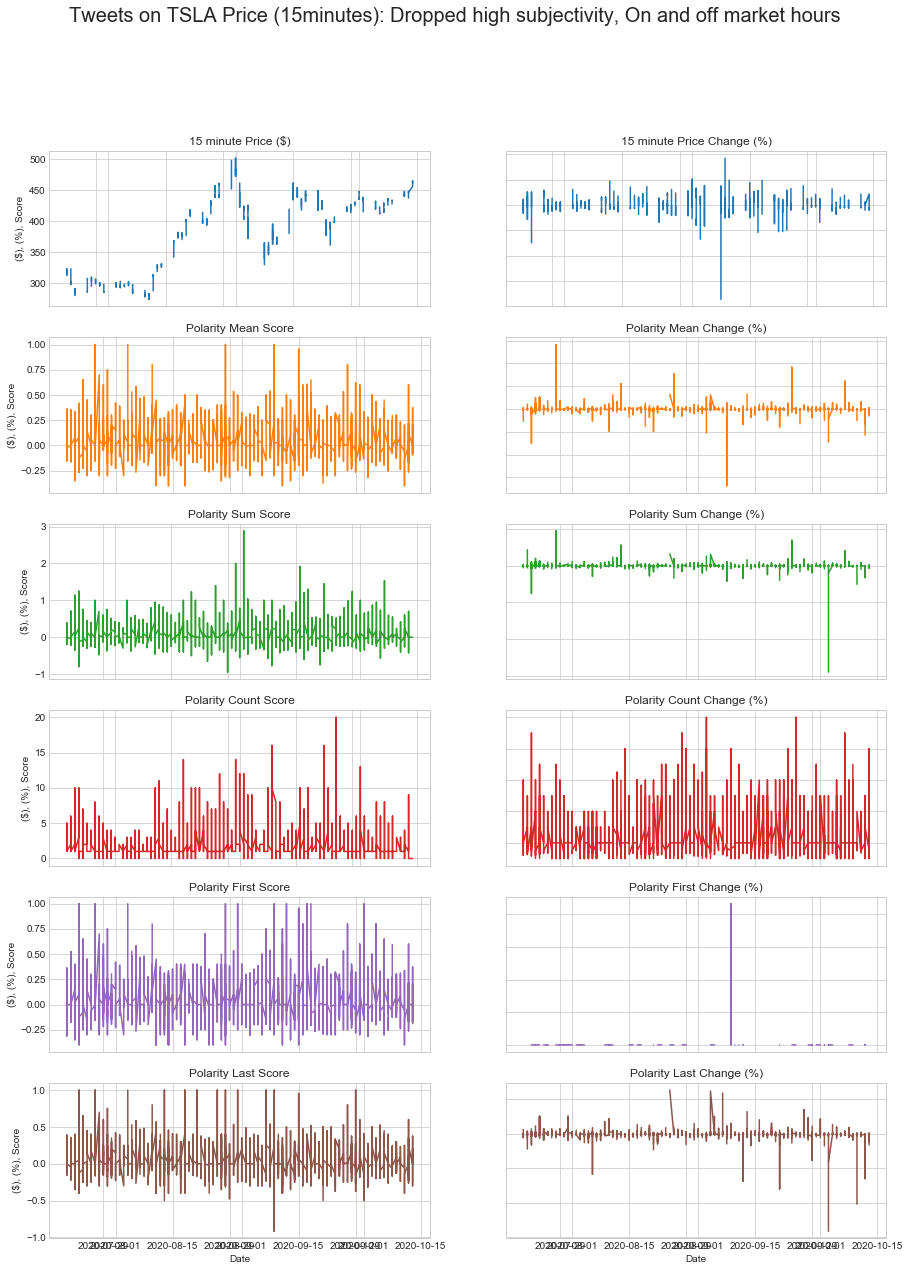

In [32]:
# plot total overviews
date_only = df_data.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('Tweets on TSLA Price (15minutes): Dropped high subjectivity, On and off market hours', fontsize=20)

axs[0, 0].plot(date_only, df_data['Close'])
axs[0, 0].set_title('15 minute Price ($)')
axs[1, 0].plot(date_only, df_data['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_data['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_data['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_data['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_data['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_data['15min return'])
axs[0, 1].set_title('15 minute Price Change (%)')
axs[1, 1].plot(date_only, df_data['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_data['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_data['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_data['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_data['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [33]:
# # plot polarity mean
# date_only = df_data.index.get_level_values(0)

# fig, ax1 = plt.subplots(figsize=(15,6))

# ax2 = ax1.twinx()
# ax1.plot(date_only, df_data['Close'], color='g')
# ax2.plot(date_only, df_data['polarity mean'], color='b', alpha=0.2)

# ax1.set_xlabel('Date')
# ax1.set_ylabel('Hourly Price ($)', color='g')
# ax2.set_ylabel('Polarity Score', color='b')
# ax1.set_xticklabels(date_only, rotation=45, size=8)

# fig.show();

In [34]:
correlation_drop = df_data.corr()
correlation_drop

Close  15min return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000      0.035979  0.061033     -0.052181       0.003004      0.064042        0.175752       -0.018355      -0.010928             -0.038988            -0.070610               0.065026              -0.032982             -0.066874
15min return           0.035979      1.000000  0.562806     -0.010137       0.024335      0.057931       -0.000359        0.007990       0.005833              0.032178             0.041504              -0.010918               0.093020              0.045751
tick                   0.061033      0.562806  1.000000     -0.033974       0.022340      0.045616        0.001366        0.024852       0.012723              0.027660             0.035557              -0.009250               0.082584              0.025098
Subjectivity          -0.052181     -0.010137 -0.033974      1.000000       0.239693      0.185113       -0.072058        0.203958       0.196515             -0.003729            -0.003180              -0.016682               0.001128              0.038222
polarity mean          0.003004      0.024335  0.022340      0.239693       1.000000      0.800000       -0.026825        0.850510       0.827779              0.007708             0.003215              -0.005738               0.013658              0.053759
polarity sum           0.064042      0.057931  0.045616      0.185113       0.800000      1.000000        0.256470        0.659193       0.662578              0.016977            -0.005378               0.159014               0.053503              0.016115
polarity count         0.175752     -0.000359  0.001366     -0.072058      -0.026825      0.256470        1.000000       -0.054597      -0.020518              0.006545            -0.005168               0.550564               0.039295             -0.029635
polarity first        -0.018355      0.007990  0.024852      0.203958       0.850510      0.659193       -0.054597        1.000000       0.513209              0.014206             0.022648              -0.024739               0.023690              0.051336
polarity last         -0.010928      0.005833  0.012723      0.196515       0.827779      0.662578       -0.020518        0.513209       1.000000              0.000320            -0.010460              -0.005591              -0.006560              0.070389
polarity mean change  -0.038988      0.032178  0.027660     -0.003729       0.007708      0.016977        0.006545        0.014206       0.000320              1.000000             0.686580              -0.016348               0.003865              0.417323
polarity sum change   -0.070610      0.041504  0.035557     -0.003180       0.003215     -0.005378       -0.005168        0.022648      -0.010460              0.686580             1.000000              -0.047133               0.005106              0.665470
polarity count change  0.065026     -0.010918 -0.009250     -0.016682      -0.005738      0.159014        0.550564       -0.024739      -0.005591             -0.016348            -0.047133               1.000000               0.009706             -0.065530
polarity first change -0.032982      0.093020  0.082584      0.001128       0.013658      0.053503        0.039295        0.023690      -0.006560              0.003865             0.005106               0.009706               1.000000              0.228144
polarity last change  -0.066874      0.045751  0.025098      0.038222       0.053759      0.016115       -0.029635        0.051336       0.070389              0.417323             0.665470              -0.065530               0.228144              1.000000

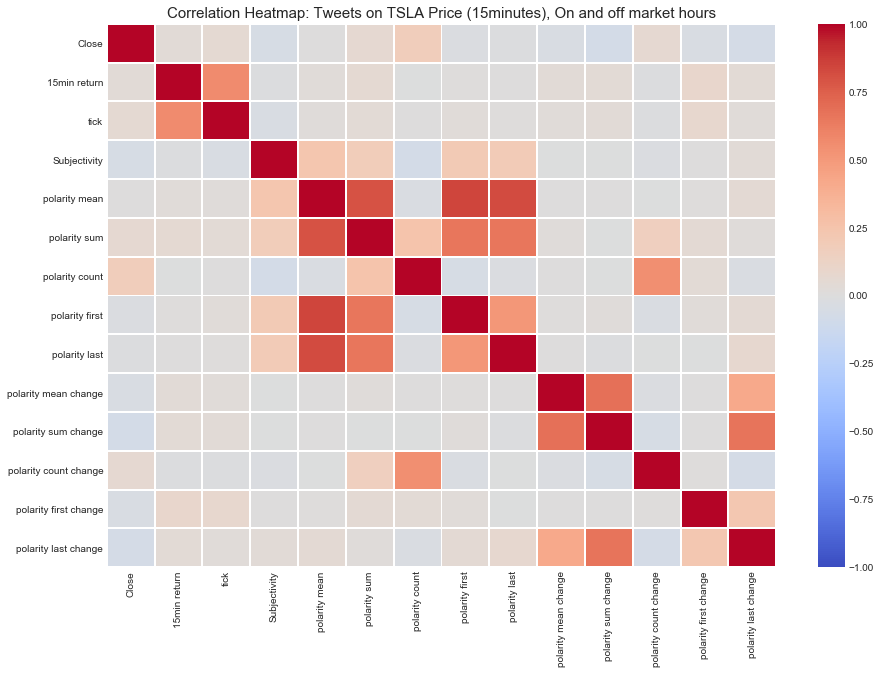

In [35]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap: Tweets on TSLA Price (15minutes), On and off market hours', fontsize=15)
sns.heatmap(correlation_drop, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');

### 2. Using various sentiment score(Polarity only) for only the texts that matches with market hours. 

In [36]:
# Dropping unmatching rows 
df_2 = df_data.dropna()
df_2

Close  15min return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour minute                                                                                                                                                                                                                                         
2020-07-22 9    15      317.351990     -0.007518   0.0      0.238846   1.113636e-01  4.454545e-01               4        0.150000       0.083333                   inf                  inf               1.000000                    inf                   inf
                30      317.200012     -0.000479   0.0      0.266128   4.346801e-02  1.304040e-01               3        0.018182       0.150000         -6.096750e-01            -0.707256              -0.250000              -0.878788              0.800000
                45      314.821991     -0.007497   0.0      0.397619  -1.011905e-02 -2.023810e-02               2       -0.125000       0.104762         -1.232793e+00            -1.155195              -0.333333              -7.875000             -0.301587
           10   0       313.325989     -0.004752   0.0      0.216667   1.500000e-01  1.500000e-01               1        0.150000       0.150000         -1.582353e+01            -8.411765              -0.500000              -2.200000              0.431818
                15      316.834015      0.011196   1.0      0.181414   2.825758e-02  1.412879e-01               5        0.000000       0.187500         -8.116162e-01            -0.058081               4.000000              -1.000000              0.250000
                30      317.649994      0.002575   1.0      0.309848   2.007576e-02  4.015152e-02               2       -0.059848       0.100000         -2.895442e-01            -0.715818              -0.600000                   -inf             -0.466667
                45      316.622009     -0.003236   0.0      0.177083   5.208333e-02  2.083333e-01               4        0.000000       0.333333          1.594340e+00             4.188679               1.000000              -1.000000              2.333333
           11   0       316.800018      0.000562   1.0      0.306176   1.645089e-01  6.580357e-01               4        0.214286       0.316667          2.158571e+00             2.158571               0.000000                    inf             -0.050000
                15      317.595001      0.002509   1.0      0.214167   1.075000e-01  2.150000e-01               2        0.065000       0.150000         -3.465400e-01            -0.673270              -0.500000              -0.696667             -0.526316
                30      317.408020     -0.000589   0.0      0.129167  -2.083333e-02 -1.250000e-01               6        0.000000      -0.125000         -1.193798e+00            -1.581395               2.000000              -1.000000             -1.833333
           12   0       317.115997      0.000284   1.0      0.134762   5.000000e-02  2.500000e-01               5        0.250000       0.000000         -5.510204e-01            -0.438776               0.250000                    inf             -1.000000
                45      315.400024     -0.005584   0.0      0.138889   7.500000e-02  1.500000e-01               2        0.000000       0.150000         -3.617860e-01            -0.744714              -0.600000              -1.000000                   inf
           13   30      316.849182      0.004990   1.0      0.263889  -9.722222e-02 -9.722222e-02               1       -0.097222      -0.097222         -1.486111e+00            -1.243056              -0.500000              -1.243056                  -inf
                45      320.292023      0.010866   1.0      0.148701   4.853896e-02  2.912338e-01               6        0.000000       0.100000         -1.499258e+00            -3.995547  

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


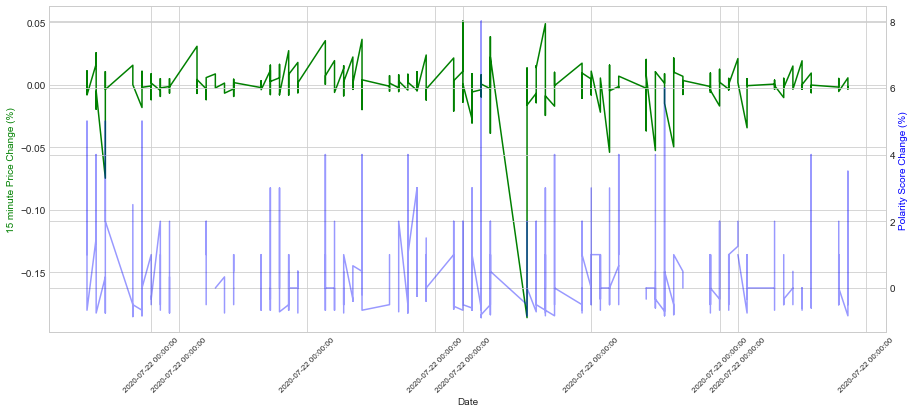

In [37]:
# plot polarity mean change vs 15min return
date_only = df_2.index.get_level_values(0)

fig, ax1 = plt.subplots(figsize=(15,6))

ax2 = ax1.twinx()
ax1.plot(date_only, df_2['15min return'], color='g')
ax2.plot(date_only, df_2['polarity count change'], color='b', alpha=0.4)

ax1.set_xlabel('Date')
ax1.set_ylabel('15 minute Price Change (%)', color='g')
ax2.set_ylabel('Polarity Score Change (%)', color='b')
ax1.set_xticklabels(date_only, rotation=45, size=8)

fig.show();

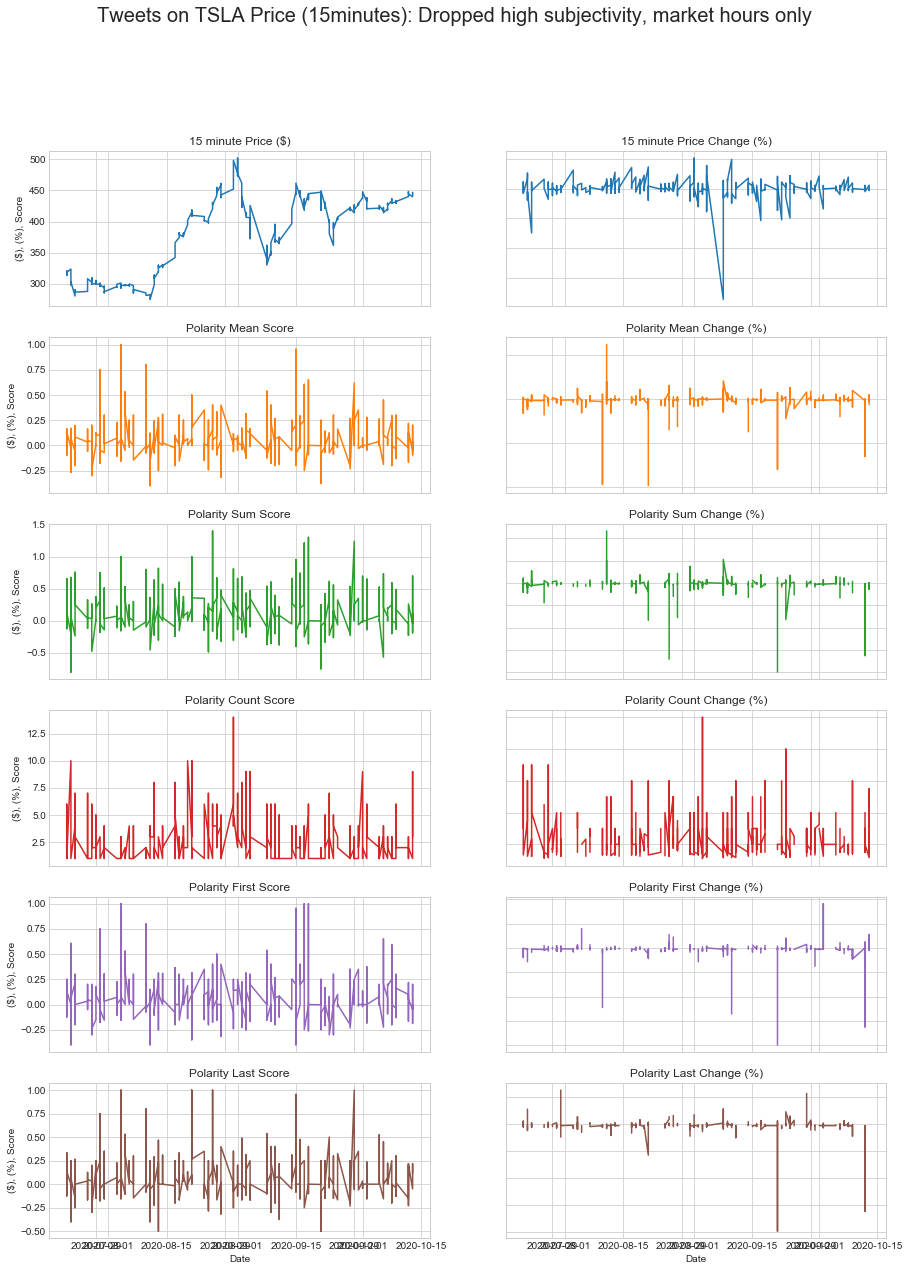

In [38]:
# plot total overviews
date_only = df_2.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('Tweets on TSLA Price (15minutes): Dropped high subjectivity, market hours only', fontsize=20)

axs[0, 0].plot(date_only, df_2['Close'])
axs[0, 0].set_title('15 minute Price ($)')
axs[1, 0].plot(date_only, df_2['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_2['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_2['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_2['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_2['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_2['15min return'])
axs[0, 1].set_title('15 minute Price Change (%)')
axs[1, 1].plot(date_only, df_2['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_2['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_2['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_2['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_2['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

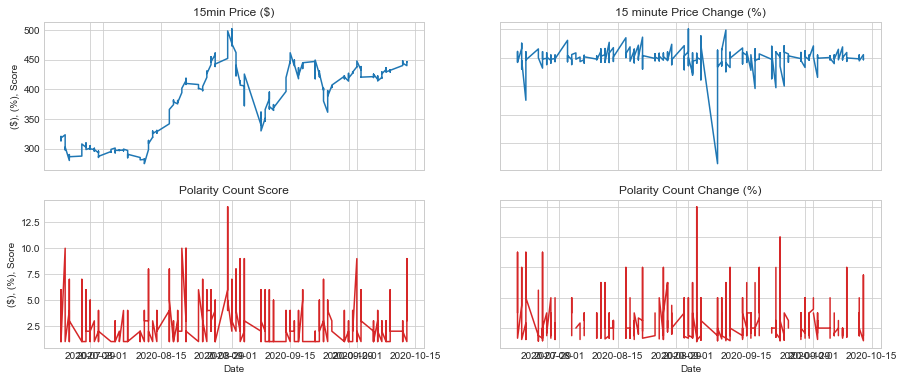

In [39]:
date_only = df_2.index.get_level_values(0)

fig, axs = plt.subplots(2, 2, figsize=(15,6))
axs[0, 0].plot(date_only, df_2['Close'])
axs[0, 0].set_title('15min Price ($)')
axs[1, 0].plot(date_only, df_2['polarity count'], 'tab:red')
axs[1, 0].set_title('Polarity Count Score')

axs[0, 1].plot(date_only, df_2['15min return'])
axs[0, 1].set_title('15 minute Price Change (%)')
axs[1, 1].plot(date_only, df_2['polarity count change'], 'tab:red')
axs[1, 1].set_title('Polarity Count Change (%)')


for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [40]:
correlation_drop_2 = df_2.corr()
correlation_drop_2

Close  15min return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000      0.060759  0.066503     -0.031273       0.029141      0.086729        0.170522        0.009926       0.009676             -0.035006            -0.089269               0.029859              -0.014808             -0.075511
15min return           0.060759      1.000000  0.538667     -0.016812       0.031024      0.062378        0.022925        0.014239       0.024534              0.028164             0.049092               0.009932               0.095126              0.040553
tick                   0.066503      0.538667  1.000000     -0.070740       0.015988      0.037843        0.000638        0.026590       0.007486              0.019850             0.023939              -0.067861               0.091457              0.025265
Subjectivity          -0.031273     -0.016812 -0.070740      1.000000       0.212338      0.129368       -0.191249        0.177528       0.177050             -0.075898            -0.044501              -0.095893              -0.078116             -0.019080
polarity mean          0.029141      0.031024  0.015988      0.212338       1.000000      0.811544       -0.125258        0.833180       0.827956             -0.098361            -0.002976              -0.089831              -0.118134              0.002781
polarity sum           0.086729      0.062378  0.037843      0.129368       0.811544      1.000000        0.169791        0.649006       0.717414             -0.007386             0.075407               0.115124              -0.009162              0.065815
polarity count         0.170522      0.022925  0.000638     -0.191249      -0.125258      0.169791        1.000000       -0.148241      -0.068556              0.056929             0.058046               0.525181               0.056975              0.028708
polarity first         0.009926      0.014239  0.026590      0.177528       0.833180      0.649006       -0.148241        1.000000       0.489653             -0.062369             0.009468              -0.072348              -0.082203             -0.023559
polarity last          0.009676      0.024534  0.007486      0.177050       0.827956      0.717414       -0.068556        0.489653       1.000000             -0.105861            -0.027806              -0.047142              -0.100666              0.043313
polarity mean change  -0.035006      0.028164  0.019850     -0.075898      -0.098361     -0.007386        0.056929       -0.062369      -0.105861              1.000000             0.876756               0.020155               0.551328              0.654149
polarity sum change   -0.089269      0.049092  0.023939     -0.044501      -0.002976      0.075407        0.058046        0.009468      -0.027806              0.876756             1.000000              -0.009929               0.534145              0.739500
polarity count change  0.029859      0.009932 -0.067861     -0.095893      -0.089831      0.115124        0.525181       -0.072348      -0.047142              0.020155            -0.009929               1.000000               0.054189              0.005683
polarity first change -0.014808      0.095126  0.091457     -0.078116      -0.118134     -0.009162        0.056975       -0.082203      -0.100666              0.551328             0.534145               0.054189               1.000000              0.775073
polarity last change  -0.075511      0.040553  0.025265     -0.019080       0.002781      0.065815        0.028708       -0.023559       0.043313              0.654149             0.739500               0.005683               0.775073              1.000000

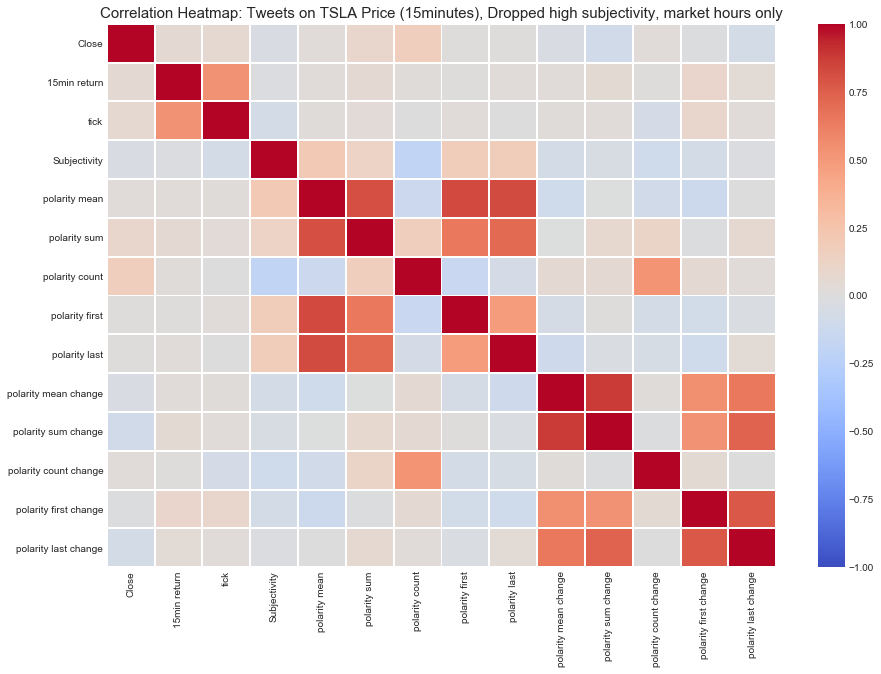

In [41]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap: Tweets on TSLA Price (15minutes), Dropped high subjectivity, market hours only', fontsize=15)
sns.heatmap(correlation_drop_2, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');

In [42]:
# # plot the highest correlation with 15min return
# date_only = df_2.index.get_level_values(0)

# fig, ax1 = plt.subplots(figsize=(15,6))
# ax1.set_title('Hourly return vs. Polarity Mean Change(dropped high subjectivity)')

# ax2 = ax1.twinx()
# ax1.plot(date_only, df_2['hourly return'], color='g')
# ax2.plot(date_only, df_2['polarity mean change'], color='b', alpha=0.4)

# ax1.set_xlabel('Date')
# ax1.set_ylabel('Hourly Price Change (%)', color='g')
# ax2.set_ylabel('Polarity Score Change (%)', color='b')
# ax1.set_xticklabels(date_only, rotation=45, size=8)

# fig.show();

### 3. Using adjusted sentiment score for all texts regardless of market hours

In [46]:
# take the average polarity scores in the same hour window.
df_weight = df_weight.rename(columns = {'Adj Polarity':'Polarity'})
df_mean = df_weight.groupby(['date only', 'hour', 'minute']).mean()
df_sum = df_weight.groupby(['date only', 'hour', 'minute']).sum()
df_count = df_weight.groupby(['date only', 'hour', 'minute']).count()
df_first = df_weight.groupby(['date only', 'hour', 'minute']).first()
df_last = df_weight.groupby(['date only', 'hour', 'minute']).last()
df_data = df_mean.copy()

In [47]:
df_data = df_data.rename(columns = {'Polarity':'polarity mean'})
df_data['polarity sum'] = df_sum['Polarity']
df_data['polarity count'] = df_count['Polarity']
df_data['polarity first'] = df_first['Polarity']
df_data['polarity last'] = df_last['Polarity']
df_data.head()

Close  15min return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last
date only  hour minute                                                                                                                     
2020-07-20 0    0         NaN           NaN   NaN      0.410417       0.225000      0.450000               2        0.300000       0.150000
                15        NaN           NaN   NaN      0.527778       0.127778      0.127778               1        0.127778       0.127778
                30        NaN           NaN   NaN      0.367143       0.260571      0.260571               1        0.260571       0.260571
           1    30        NaN           NaN   NaN      0.312500       0.200000      0.400000               2        0.400000       0.000000
           2    0         NaN           NaN   NaN      0.337500       0.085764      0.171528               2        0.152778       0.018750

In [48]:
df_data['polarity mean change'] = df_data['polarity mean'].pct_change()
df_data['polarity sum change'] = df_data['polarity sum'].pct_change()
df_data['polarity count change'] = df_data['polarity count'].pct_change()
df_data['polarity first change'] = df_data['polarity first'].pct_change()
df_data['polarity last change'] = df_data['polarity last'].pct_change()
df_data.head()

Close  15min return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour minute                                                                                                                                                                                                                                    
2020-07-20 0    0         NaN           NaN   NaN      0.410417       0.225000      0.450000               2        0.300000       0.150000                   NaN                  NaN                    NaN                    NaN                   NaN
                15        NaN           NaN   NaN      0.527778       0.127778      0.127778               1        0.127778       0.127778             -0.432099            -0.716049                   -0.5              -0.574074             -0.148148
                30        NaN           NaN   NaN      0.367143       0.260571      0.260571               1        0.260571       0.260571              1.039255             1.039255                    0.0               1.039255              1.039255
           1    30        NaN           NaN   NaN      0.312500       0.200000      0.400000               2        0.400000       0.000000             -0.232456             0.535088                    1.0               0.535088             -1.000000
           2    0         NaN           NaN   NaN      0.337500       0.085764      0.171528               2        0.152778       0.018750             -0.571181            -0.571181                    0.0              -0.618056                   inf

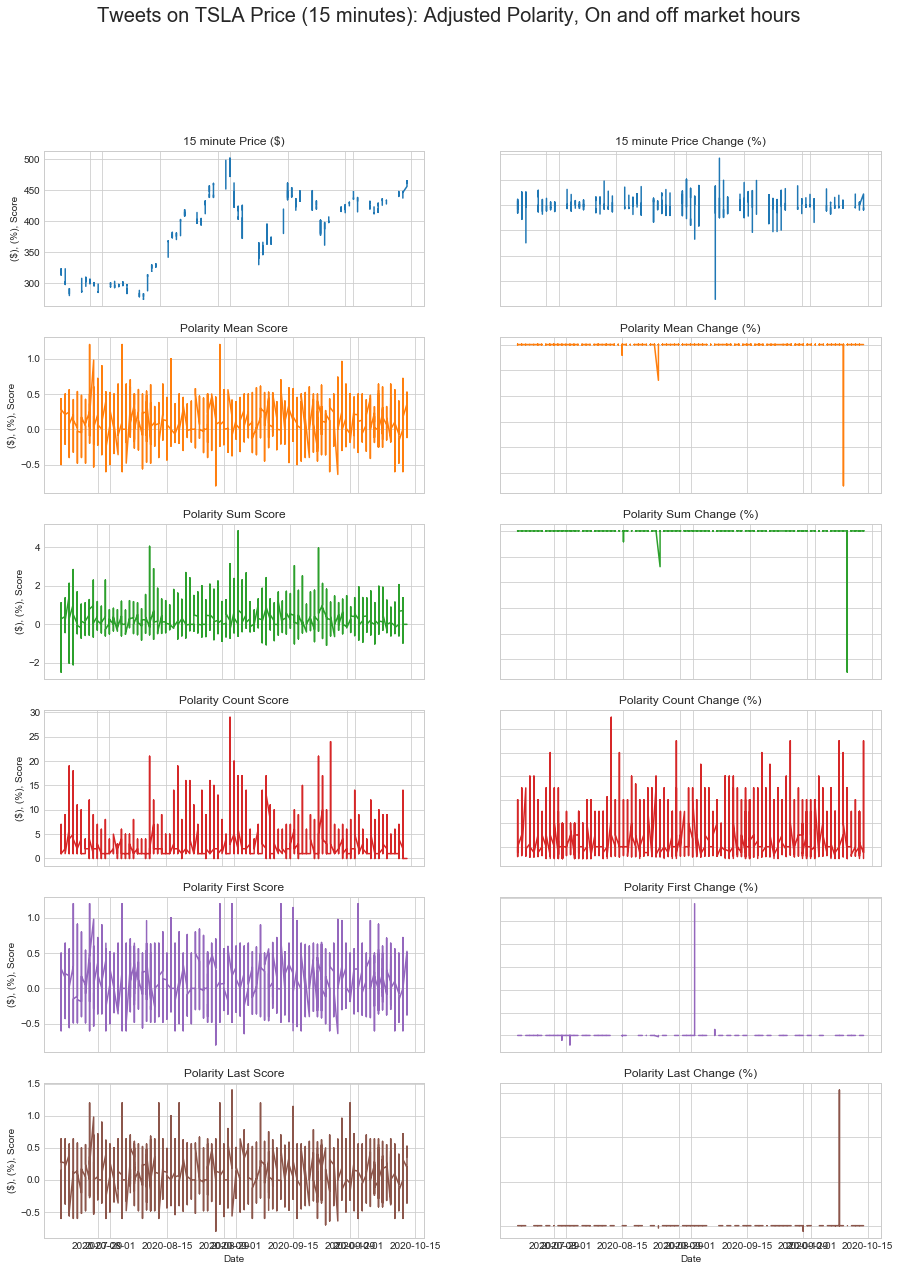

In [49]:
# plot total overviews
date_only = df_data.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('Tweets on TSLA Price (15 minutes): Adjusted Polarity, On and off market hours', fontsize=20)

axs[0, 0].plot(date_only, df_data['Close'])
axs[0, 0].set_title('15 minute Price ($)')
axs[1, 0].plot(date_only, df_data['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_data['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_data['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_data['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_data['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_data['15min return'])
axs[0, 1].set_title('15 minute Price Change (%)')
axs[1, 1].plot(date_only, df_data['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_data['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_data['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_data['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_data['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [50]:
correlation_weight = df_data.corr()
correlation_weight

Close  15min return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000      0.035979  0.061033     -0.062727      -0.031007      0.119737        0.180807       -0.037149      -0.027199             -0.036742            -0.030720               0.050438               0.030812              0.025257
15min return           0.035979      1.000000  0.562806     -0.015886      -0.019466      0.014318       -0.014535       -0.014165      -0.012774             -0.008392            -0.008020               0.008909               0.011674             -0.007841
tick                   0.061033      0.562806  1.000000      0.030106      -0.012335      0.038425        0.029713       -0.017992      -0.015988             -0.033881            -0.030330               0.017317               0.029998             -0.030002
Subjectivity          -0.062727     -0.015886  0.030106      1.000000       0.175013      0.107314       -0.041036        0.137297       0.115821             -0.007424            -0.007481              -0.016267              -0.004347             -0.004794
polarity mean         -0.031007     -0.019466 -0.012335      0.175013       1.000000      0.640414       -0.033772        0.731622       0.726495              0.023481             0.023606              -0.002638               0.007528              0.003687
polarity sum           0.119737      0.014318  0.038425      0.107314       0.640414      1.000000        0.487511        0.461695       0.458712              0.018554             0.018761               0.194970               0.038257              0.020232
polarity count         0.180807     -0.014535  0.029713     -0.041036      -0.033772      0.487511        1.000000       -0.035255      -0.031994              0.008367             0.008614               0.359200               0.036984              0.020856
polarity first        -0.037149     -0.014165 -0.017992      0.137297       0.731622      0.461695       -0.035255        1.000000       0.311544              0.025771             0.025956               0.010479               0.029692             -0.006067
polarity last         -0.027199     -0.012774 -0.015988      0.115821       0.726495      0.458712       -0.031994        0.311544       1.000000              0.008039             0.008079              -0.003251               0.003546              0.012255
polarity mean change  -0.036742     -0.008392 -0.033881     -0.007424       0.023481      0.018554        0.008367        0.025771       0.008039              1.000000             1.000000               0.003774               0.002808              0.004668
polarity sum change   -0.030720     -0.008020 -0.030330     -0.007481       0.023606      0.018761        0.008614        0.025956       0.008079              1.000000             1.000000               0.003774               0.002813              0.004672
polarity count change  0.050438      0.008909  0.017317     -0.016267      -0.002638      0.194970        0.359200        0.010479      -0.003251              0.003774             0.003774               1.000000              -0.001702              0.013256
polarity first change  0.030812      0.011674  0.029998     -0.004347       0.007528      0.038257        0.036984        0.029692       0.003546              0.002808             0.002813              -0.001702               1.000000             -0.000024
polarity last change   0.025257     -0.007841 -0.030002     -0.004794       0.003687      0.020232        0.020856       -0.006067       0.012255              0.004668             0.004672               0.013256              -0.000024              1.000000

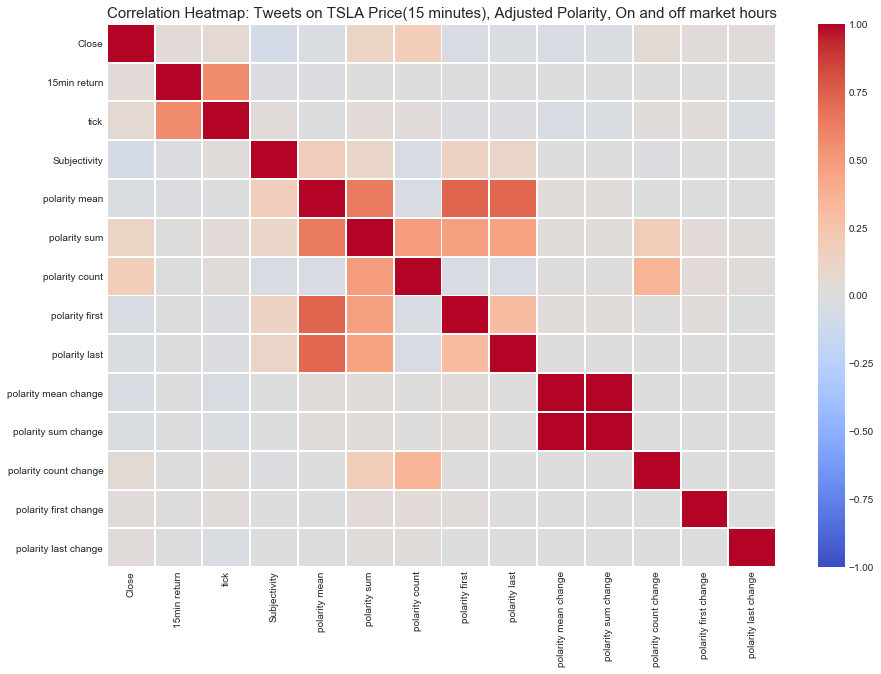

In [51]:
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap: Tweets on TSLA Price(15 minutes), Adjusted Polarity, On and off market hours', fontsize=15)
sns.heatmap(correlation_weight, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');

### 4. Using adjusted sentiment score for the texts within market hours

In [52]:
# Dropping unmatching rows 
df_2 = df_data.dropna()
df_2

Close  15min return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour minute                                                                                                                                                                                                                                         
2020-07-22 8    45      320.765991      0.007684   1.0      0.366071       0.086409      0.864091              10        0.000000  -3.750000e-01             -1.536911        -2.342277e+00               1.500000          -1.000000e+00         -2.307692e-01
           9    0       319.756012     -0.003149   0.0      0.490162       0.036539      0.292315               8        0.500000  -4.875000e-01             -0.577135        -6.617083e-01              -0.200000                    inf          3.000000e-01
                15      317.351990     -0.007518   0.0      0.636600      -0.150964     -1.509643              10        0.180000  -4.875000e-01             -5.131553        -6.164442e+00               0.250000          -6.400000e-01          0.000000e+00
                30      317.200012     -0.000479   0.0      0.266128       0.052162      0.156485               3        0.021818   1.800000e-01             -1.345523        -1.103657e+00              -0.700000          -8.787879e-01         -1.369231e+00
                45      314.821991     -0.007497   0.0      0.407672      -0.109021     -0.327063               3       -0.302778   1.257143e-01             -3.090065        -3.090065e+00               0.000000          -1.487731e+01         -3.015873e-01
           10   0       313.325989     -0.004752   0.0      0.594562      -0.051435     -0.257175               5        0.150000   1.800000e-01             -0.528210        -2.136838e-01               0.666667          -1.495413e+00          4.318182e-01
                15      316.834015      0.011196   1.0      0.391739      -0.007077     -0.070772              10        0.000000   2.250000e-01             -0.862405        -7.248103e-01               1.000000          -1.000000e+00          2.500000e-01
                30      317.649994      0.002575   1.0      0.529924       0.015170      0.060682               4       -0.071818  -4.875000e-01             -3.143567        -1.857427e+00              -0.600000                   -inf         -3.166667e+00
                45      316.622009     -0.003236   0.0      0.312381       0.111667      0.781667               7        0.000000   1.400000e-01              6.360799         1.188140e+01               0.750000          -1.000000e+00         -1.287179e+00
           11   0       316.800018      0.000562   1.0      0.365228       0.223274      1.339643               6        0.050000   3.800000e-01              0.999467         7.138288e-01              -0.142857                    inf          1.714286e+00
                15      317.595001      0.002509   1.0      0.500992      -0.026663     -0.159976               6       -0.090476  -4.875000e-01             -1.119417        -1.119417e+00               0.000000          -2.809524e+00         -2.282895e+00
                30      317.408020     -0.000589   0.0      0.519833       0.116500      1.747500              15        0.000000  -1.500000e-01             -5.369400        -1.192350e+01               1.500000          -1.000000e+00         -6.923077e-01
                45      317.026001     -0.001204   0.0      0.474551       0.231061      2.079545               9        0.225000   3.600000e-01              0.983353         1.900117e-01              -0.400000                    inf         -3.400000e+00
           12   0       317.115997      0.000284   1.0      0.443601       0.005625      0.045000               8        0.300000   1.200000e-01             -0.975656        -9.783607e-01  

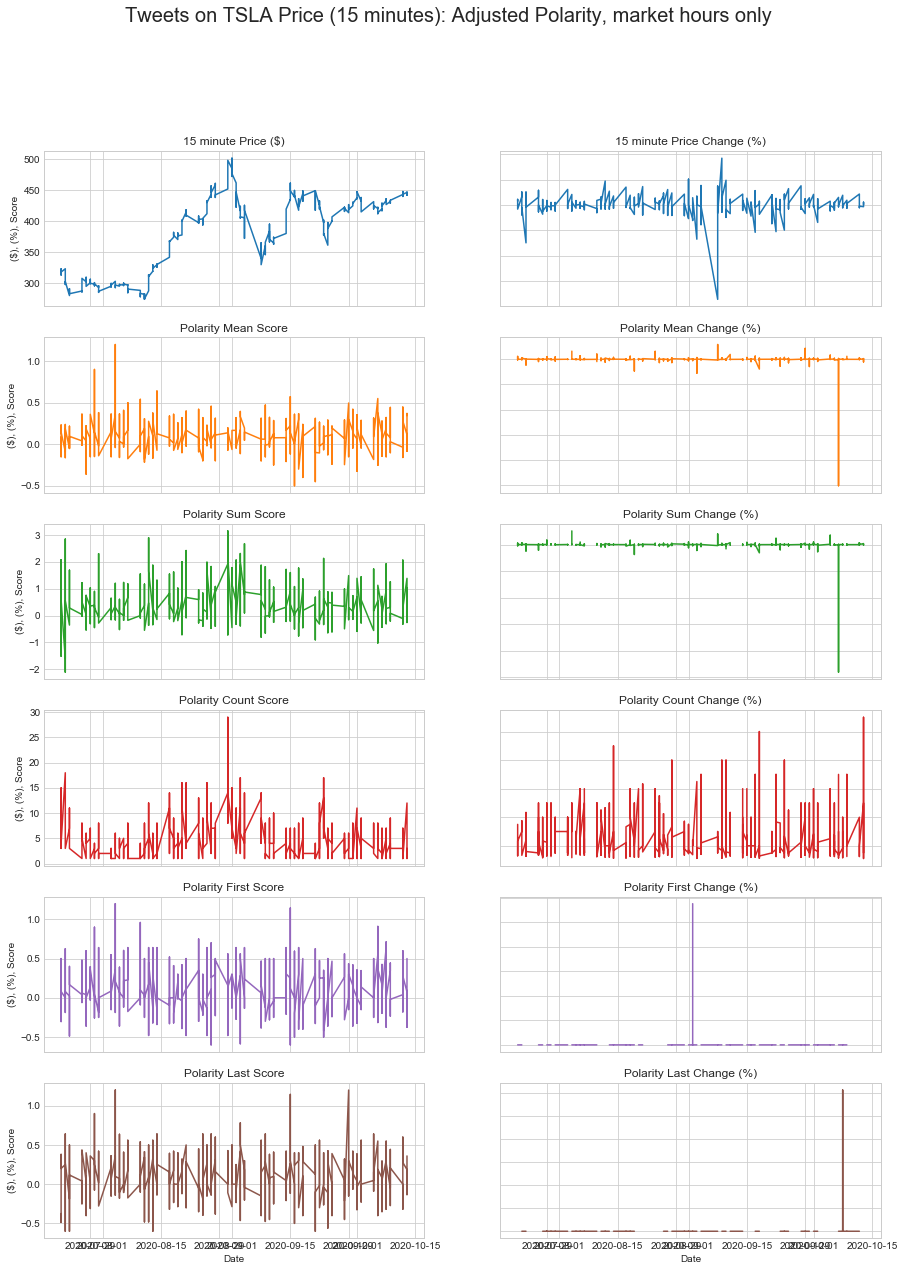

In [54]:
# plot total overviews
date_only = df_2.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('Tweets on TSLA Price (15 minutes): Adjusted Polarity, market hours only', fontsize=20)

axs[0, 0].plot(date_only, df_2['Close'])
axs[0, 0].set_title('15 minute Price ($)')
axs[1, 0].plot(date_only, df_2['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_2['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_2['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_2['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_2['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_2['15min return'])
axs[0, 1].set_title('15 minute Price Change (%)')
axs[1, 1].plot(date_only, df_2['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_2['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_2['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_2['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_2['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [55]:
correlation_weight_2 = df_2.corr()
correlation_weight_2

Close  15min return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000      0.019400  0.038457     -0.050822      -0.031498      0.114987        0.171573       -0.030889      -0.014899             -0.029765            -0.028538               0.005880               0.034812              0.028502
15min return           0.019400      1.000000  0.553663     -0.024813      -0.030037     -0.019020       -0.030853       -0.011639      -0.007317             -0.007800            -0.008968              -0.010860               0.011959             -0.008498
tick                   0.038457      0.553663  1.000000      0.030499      -0.018736      0.019182        0.021353       -0.010615      -0.023229             -0.035339            -0.036180              -0.010434               0.032648             -0.032867
Subjectivity          -0.050822     -0.024813  0.030499      1.000000       0.168535      0.077855       -0.094349        0.116429       0.082743              0.005121            -0.004483              -0.070369              -0.004043             -0.014671
polarity mean         -0.031498     -0.030037 -0.018736      0.168535       1.000000      0.616172       -0.088930        0.602362       0.631013              0.026178             0.018270              -0.046446               0.011627              0.008388
polarity sum           0.114987     -0.019020  0.019182      0.077855       0.616172      1.000000        0.467194        0.369469       0.412411              0.005848             0.009461               0.109171               0.059641              0.028132
polarity count         0.171573     -0.030853  0.021353     -0.094349      -0.088930      0.467194        1.000000       -0.048805      -0.031794             -0.013544            -0.003270               0.264753               0.049250              0.022945
polarity first        -0.030889     -0.011639 -0.010615      0.116429       0.602362      0.369469       -0.048805        1.000000       0.172465              0.024924             0.018219              -0.027646               0.062073             -0.015646
polarity last         -0.014899     -0.007317 -0.023229      0.082743       0.631013      0.412411       -0.031794        0.172465       1.000000             -0.012934            -0.011913               0.000084               0.001657              0.026757
polarity mean change  -0.029765     -0.007800 -0.035339      0.005121       0.026178      0.005848       -0.013544        0.024924      -0.012934              1.000000             0.987964              -0.003808               0.004885              0.001195
polarity sum change   -0.028538     -0.008968 -0.036180     -0.004483       0.018270      0.009461       -0.003270        0.018219      -0.011913              0.987964             1.000000               0.010321               0.004826              0.002247
polarity count change  0.005880     -0.010860 -0.010434     -0.070369      -0.046446      0.109171        0.264753       -0.027646       0.000084             -0.003808             0.010321               1.000000              -0.007932              0.027423
polarity first change  0.034812      0.011959  0.032648     -0.004043       0.011627      0.059641        0.049250        0.062073       0.001657              0.004885             0.004826              -0.007932               1.000000             -0.001295
polarity last change   0.028502     -0.008498 -0.032867     -0.014671       0.008388      0.028132        0.022945       -0.015646       0.026757              0.001195             0.002247               0.027423              -0.001295              1.000000

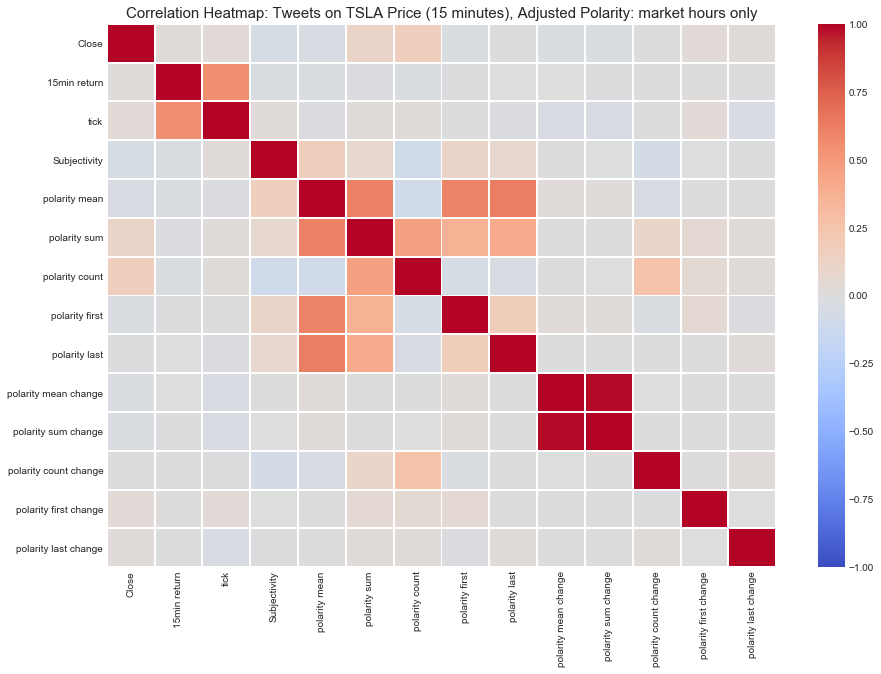

In [56]:
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap: Tweets on TSLA Price (15 minutes), Adjusted Polarity: market hours only', fontsize=15)
sns.heatmap(correlation_weight_2, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');